Submitted by:SINDHU SHREE N

Batch Number:1832

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pickle
import warnings
warnings.filterwarnings("ignore")

# Examining the data:

In [2]:
df=pd.read_csv("advertising_channels.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [4]:
df.sample(5)

,Unnamed: 0,TV,radio,newspaper,sales
122,123,224.0,2.4,15.6,11.6
123,124,123.1,34.6,12.4,15.2
40,41,202.5,22.3,31.6,16.6
27,28,240.1,16.7,22.9,15.9
65,66,69.0,9.3,0.9,9.3


So by observing the above dataset we can know that the dataset contains only numerical values.

# Exploratory Data Analysis:

In [5]:
df.shape

(200, 5)

We can see that the dataset contains 200 rows and 5 columns in which 4 are float datatype and one is integer datatype as listed below.

In [6]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.keys()

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

Checking null values:

In [9]:
df.isnull()

,Unnamed: 0,TV,radio,newspaper,sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [10]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

We can see that there is no null values so our data is clean and no need to do data cleaning.

In [11]:
#summary statistics
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


1. We can see that the mean is greater than median in 'radio','newspaper' and 'sales' column.

2. There is a large difference between 75th percentile and the maximum value in 'newspaper' column so there may be a chances of having an outliers. 

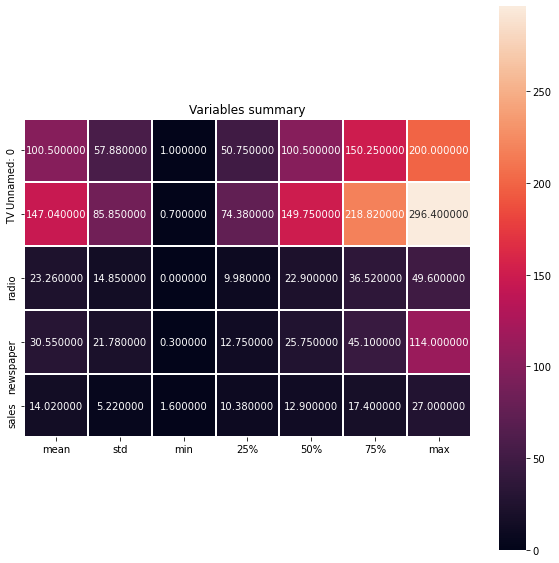

In [12]:
figure=plt.figure(figsize=(5,6))
figure.set_size_inches(10,10)
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=1,fmt="f",annot=True,square=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Variables summary")
plt.show()

The Outcome of the describe data is as follows.
 
Unnamed:0:
    
    mean=100.500000
    std=57.879185
    min_value=1.000000
    max_value=200.000000
    
TV:
    
    mean=147.042500
    std=85.854236
    min_value=0.700000
    max_value=296.400000

radio:
    
    mean=23.264000
    std=14.846809
    min_value=0.000000
    max_value=49.600000
    
newspaper:
    
    mean=30.554000
    std=21.778621
    min_value=0.300000
    max_value=114.000000
    
sales:
    
    mean=14.022500
    std=5.21457
    min_value=1.600000
    max_value=27.000000

Checking unique values: 

In [13]:
df.sales.unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

There are lot of unique values in sales column.

In [14]:
df.sales.value_counts()

9.7     5
15.9    4
11.7    4
12.9    4
20.7    3
       ..
25.5    1
15.6    1
17.6    1
3.2     1
20.8    1
Name: sales, Length: 121, dtype: int64

In [15]:
df.TV.unique()

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 100.4, 216.4, 182.6, 262.7,
       198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3, 102.7,
       131.1,  69. ,  31.5, 139.3, 216.8, 199.1, 109.8,  26.8, 129.4,
       213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4, 239.8,  75.3,
        68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 134.3,  28.6, 217.7,
       250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4, 296.4,
       280.2, 187.9, 238.2, 137.9,  25. ,  90.4,  13.1, 255.4, 225.8,
       241.7, 175.7, 209.6,  78.2,  75.1, 139.2, 125.7,  19.4, 141.3,
        18.8, 224. , 123.1, 229.5,  87.2,   7.8,  80.2, 220.3,  59.6,
         0.7, 265.2,

In [16]:
df.TV.value_counts()

76.4     2
17.2     2
240.1    2
197.6    2
184.9    2
        ..
117.2    1
289.7    1
137.9    1
220.5    1
13.1     1
Name: TV, Length: 190, dtype: int64

In [17]:
df.radio.unique()

array([37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6,  2.1,  2.6,  5.8,
       24. , 35.1,  7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7,  5.1,
       15.9, 16.9, 12.6,  3.5, 29.3, 16.7, 27.1, 16. , 28.3, 17.4,  1.5,
       20. ,  1.4,  4.1, 43.8, 49.4, 26.7, 37.7, 22.3, 33.4,  8.4, 25.7,
       22.5,  9.9, 41.5, 15.8, 11.7,  3.1,  9.6, 41.7, 46.2, 28.8, 28.1,
       19.2, 49.6, 29.5,  2. , 42.7, 15.5, 29.6, 42.8,  9.3, 24.6, 14.5,
       27.5, 43.9, 30.6, 14.3, 33. ,  5.7, 43.7,  1.6, 28.5, 29.9,  7.7,
       20.3, 44.5, 43. , 18.4, 40.6, 25.5, 47.8,  4.9, 33.5, 36.5, 14. ,
       31.6, 21. , 42.3,  4.3, 36.3, 10.1, 17.2, 34.3, 46.4, 11. ,  0.3,
        0.4, 26.9,  8.2, 38. , 15.4, 20.6, 46.8, 35. ,  0.8, 36.9, 26.8,
       21.7,  2.4, 34.6, 32.3, 11.8, 38.9,  0. , 49. , 12. ,  2.9, 27.2,
       38.6, 47. , 39. , 28.9, 25.9, 17. , 35.4, 33.2, 14.8,  1.9,  7.3,
       40.3, 25.8, 13.9, 23.3, 39.7, 21.1, 11.6, 43.5,  1.3, 18.1, 35.8,
       36.8, 14.7,  3.4, 37.6,  5.2, 23.6, 10.6, 20

In [18]:
df.value_counts()

Unnamed: 0  TV     radio  newspaper  sales
1           230.1  37.8   69.2       22.1     1
138         273.7  28.9   59.7       20.8     1
128         80.2   0.0    9.2        8.8      1
129         220.3  49.0   3.2        24.7     1
130         59.6   12.0   43.1       9.7      1
                                             ..
70          216.8  43.9   27.2       22.3     1
71          199.1  30.6   38.7       18.3     1
72          109.8  14.3   31.7       12.4     1
73          26.8   33.0   19.3       8.8      1
200         232.1  8.6    8.7        13.4     1
Length: 200, dtype: int64

In [19]:
df.newspaper.unique()

array([ 69.2,  45.1,  69.3,  58.5,  58.4,  75. ,  23.5,  11.6,   1. ,
        21.2,  24.2,   4. ,  65.9,   7.2,  46. ,  52.9, 114. ,  55.8,
        18.3,  19.1,  53.4,  49.6,  26.2,  19.5,  12.6,  22.9,  40.8,
        43.2,  38.6,  30. ,   0.3,   7.4,   8.5,   5. ,  45.7,  35.1,
        32. ,  31.6,  38.7,   1.8,  26.4,  43.3,  31.5,  35.7,  18.5,
        49.9,  36.8,  34.6,   3.6,  39.6,  58.7,  15.9,  60. ,  41.4,
        16.6,  37.7,   9.3,  21.4,  54.7,  27.3,   8.4,  28.9,   0.9,
         2.2,  10.2,  11. ,  27.2,  31.7,  19.3,  31.3,  13.1,  89.4,
        20.7,  14.2,   9.4,  23.1,  22.3,  36.9,  32.5,  35.6,  33.8,
        65.7,  16. ,  63.2,  73.4,  51.4,  33. ,  59. ,  72.3,  10.9,
         5.9,  22. ,  51.2,  45.9,  49.8, 100.9,  17.9,   5.3,  29.7,
        23.2,  25.6,   5.5,  56.5,   2.4,  10.7,  34.5,  52.7,  14.8,
        79.2,  46.2,  50.4,  15.6,  12.4,  74.2,  25.9,  50.6,   9.2,
         3.2,  43.1,   8.7,  43. ,   2.1,  65.6,  59.7,  20.5,   1.7,
        12.9,  75.6,

In [20]:
df.newspaper.value_counts()

25.6    3
9.3     3
8.7     3
7.4     2
22.9    2
       ..
2.4     1
13.8    1
1.8     1
57.6    1
19.4    1
Name: newspaper, Length: 172, dtype: int64

# Data Visualization:

# Univariate analysis:

<AxesSubplot:xlabel='TV', ylabel='count'>

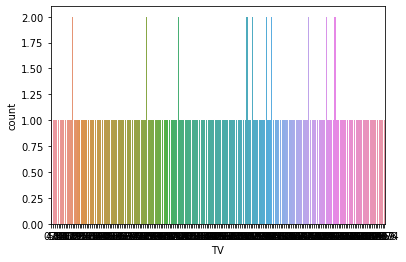

In [21]:
sns.countplot(df['TV'])

Here the data is distributed normally in all columns.

<AxesSubplot:xlabel='radio', ylabel='count'>

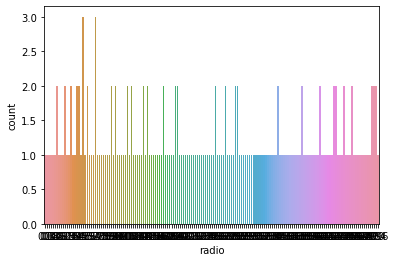

In [22]:
sns.countplot(df['radio'])

The data is distributed normally in all columns here.

<AxesSubplot:xlabel='newspaper', ylabel='count'>

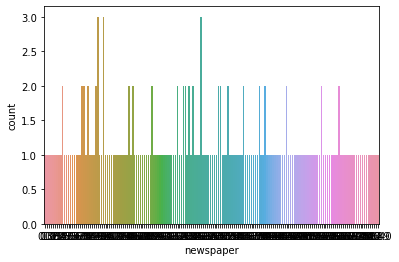

In [23]:
sns.countplot(df['newspaper'])

The data is distributed normally in all columns.

<AxesSubplot:xlabel='sales', ylabel='count'>

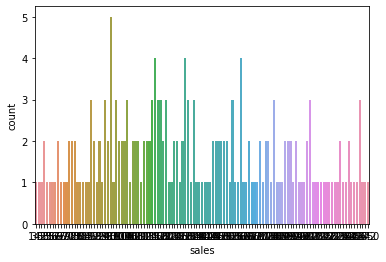

In [24]:
sns.countplot(df['sales'])

The data is not normally distributed normally in all columns.

<AxesSubplot:>

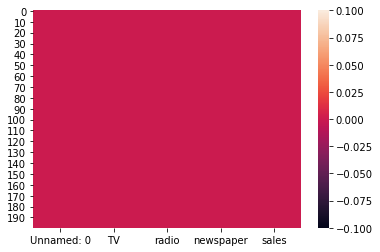

In [25]:
#plotting heatmap to check null values
sns.heatmap(df.isnull())

# Bivariate analysis:

Analyzing all features variables with the target variable. 

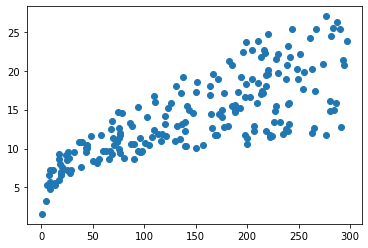

In [26]:
plt.scatter(df['TV'],df['sales'])

we can see that there is a linear slope so there is a changes of having positive correlation between TV and the target columns(sales)

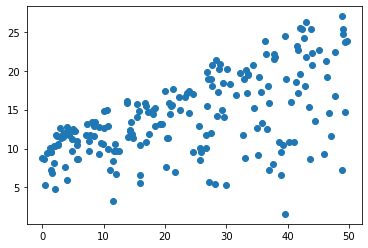

In [27]:
plt.scatter(df['radio'],df['sales'])

By above graph we can say that our target column might have a positive correlation with the radio variable.

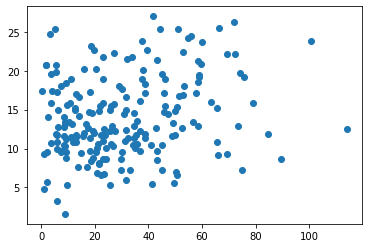

In [28]:
plt.scatter(df['newspaper'],df['sales'])

Here the data is distributed completely I think it is tricky to predict the relation of newspaper and sales.So let us analyze it by finding the correlation. 

# Correlation:

In [29]:
dfcor=df.corr()
dfcor

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

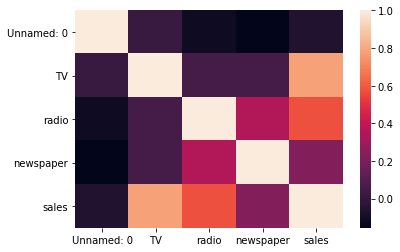

In [30]:
sns.heatmap(dfcor)

observations:
    
1. The dark shades shows a high negative correlation
2. The light shades shows a high positive correlation.
3. Here TV is having a highly negative correlation with both radio and newspaper.

<AxesSubplot:>

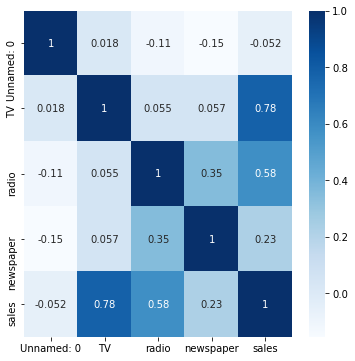

In [31]:
plt.figure(figsize=(6,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

<AxesSubplot:>

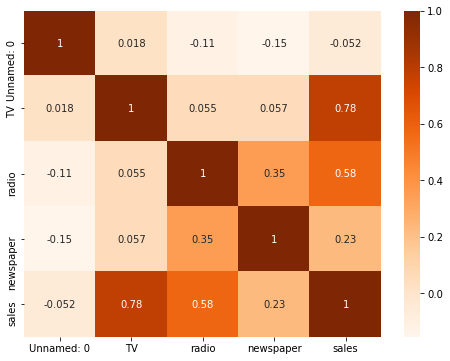

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(dfcor,cmap='Oranges',annot=True)

# Plotting Outliers:

In [33]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

<AxesSubplot:>

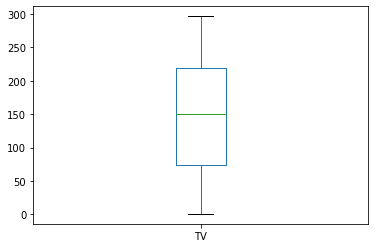

In [34]:
df['TV'].plot.box()

<AxesSubplot:>

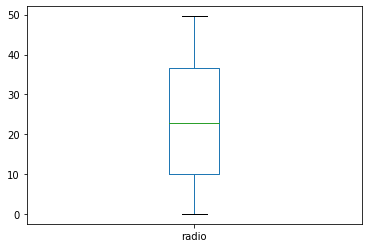

In [35]:
df['radio'].plot.box()

<AxesSubplot:>

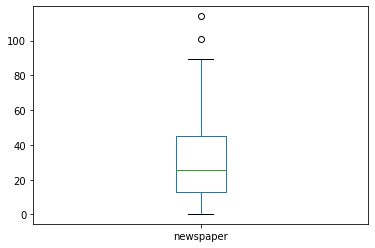

In [36]:
df['newspaper'].plot.box()

Here there is a outliers above 100.  

<AxesSubplot:>

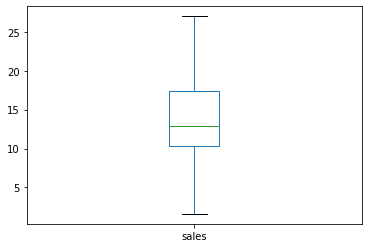

In [38]:
df['sales'].plot.box()

Unnamed: 0       AxesSubplot(0.125,0.125;0.133621x0.755)
TV            AxesSubplot(0.285345,0.125;0.133621x0.755)
radio          AxesSubplot(0.44569,0.125;0.133621x0.755)
newspaper     AxesSubplot(0.606034,0.125;0.133621x0.755)
sales         AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

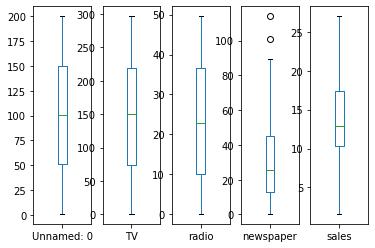

In [39]:
df.plot(kind='box', subplots=True, layout=(1,5))

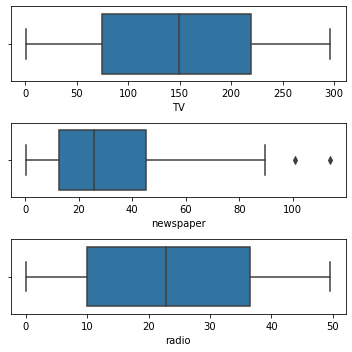

In [40]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt.tight_layout()

# Normal distribution curve:

<AxesSubplot:xlabel='TV', ylabel='Density'>

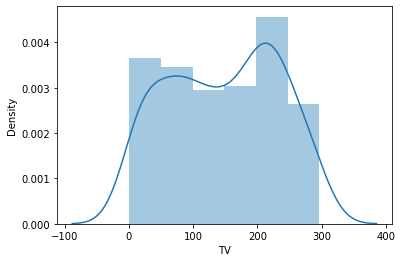

In [41]:
sns.distplot(df['TV'])

The building blocks are out of the curve so the data is not normalized here.

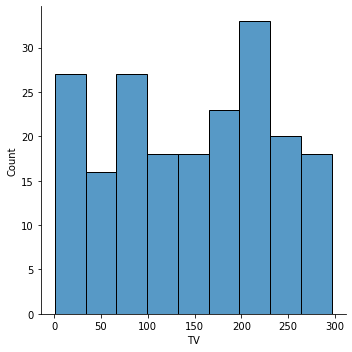

In [42]:
sns.displot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

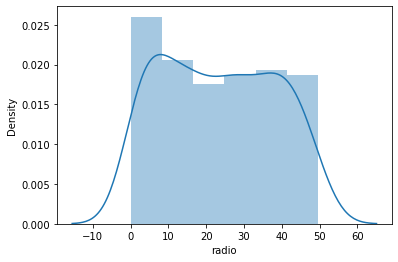

In [43]:
sns.distplot(df['radio'])

The data is not normalized since the building blocks are out of curve.

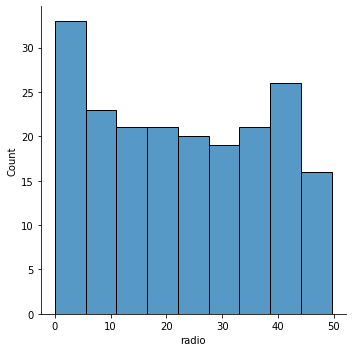

In [44]:
sns.displot(df['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

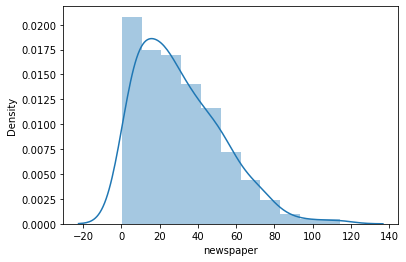

In [45]:
sns.distplot(df['newspaper'])

The data is not normalized since building blocks are not lying inside the curve and also we can observe that there is a right skewed curve here.

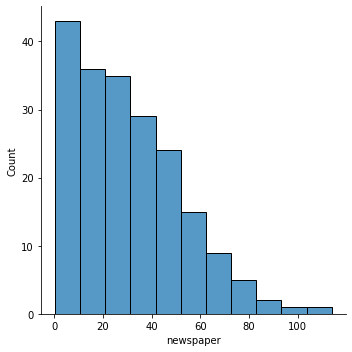

In [46]:
sns.displot(df['newspaper'])

<AxesSubplot:xlabel='sales', ylabel='Density'>

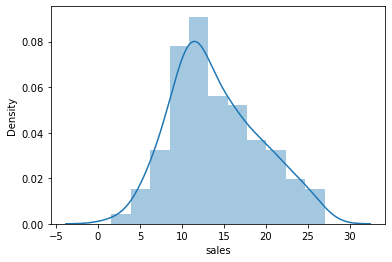

In [47]:
sns.distplot(df['sales'])

Here the data is not normalized since building blocks are out of the curve.

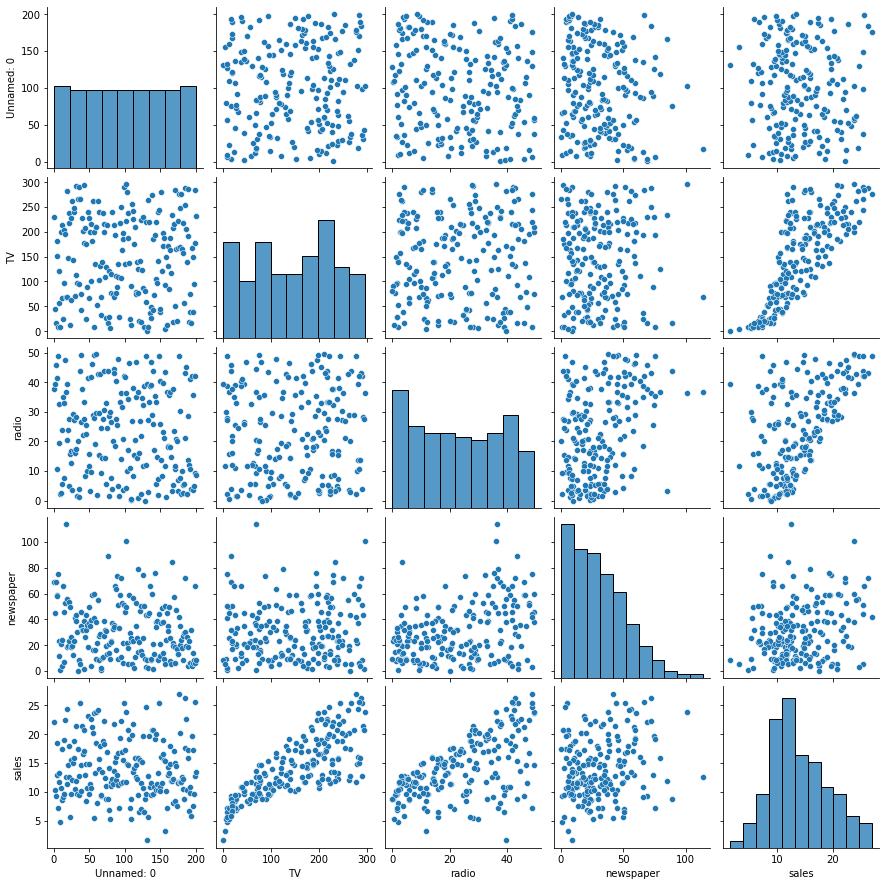

In [48]:
sns.pairplot(df)

# Removing outliers:

In [49]:
#from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.72341210e+00, 9.69852266e-01, 9.81522472e-01, 1.77894547e+00,
        1.55205313e+00],
       [1.70609137e+00, 1.19737623e+00, 1.08280781e+00, 6.69578760e-01,
        6.96046111e-01],
       [1.68877065e+00, 1.51615499e+00, 1.52846331e+00, 1.78354865e+00,
        9.07405869e-01],
       [1.67144992e+00, 5.20496822e-02, 1.21785493e+00, 1.28640506e+00,
        8.60330287e-01],
       [1.65412920e+00, 3.94182198e-01, 8.41613655e-01, 1.28180188e+00,
        2.15683025e-01],
       [1.63680847e+00, 1.61540845e+00, 1.73103399e+00, 2.04592999e+00,
        1.31091086e+00],
       [1.61948775e+00, 1.04557682e+00, 6.43904671e-01, 3.24708413e-01,
        4.27042783e-01],
       [1.60216702e+00, 3.13436589e-01, 2.47406325e-01, 8.72486994e-01,
        1.58039455e-01],
       [1.58484630e+00, 1.61657614e+00, 1.42906863e+00, 1.36042422e+00,
        1.77205942e+00],
       [1.56752558e+00, 6.16042873e-01, 1.39530685e+00, 4.30581584e-01,
        6.57617064e-01],
       [1.55020485e+00, 9.4515

In [50]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))


In [51]:
df_new=df[(z<3).all(axis=1)]

In [52]:
df_new

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [53]:
print("df shape:",df.shape)
print("df_new shape:",df_new.shape)

df shape: (200, 5)
df_new shape: (198, 5)


# Calculating the loss percent:

In [54]:
loss_percent=(200-198)/200*100
loss_percent

1.0

Since the loss percent is 1 which is less than 10 so we can proceed.

# Feature Engineering:

In [55]:
from sklearn.preprocessing import StandardScaler  #using standardScaler for scaling the data
scaler = StandardScaler()
scaledX = scaler.fit_transform(df)

In [56]:
scaledX

array([[-1.72341210e+00,  9.69852266e-01,  9.81522472e-01,
         1.77894547e+00,  1.55205313e+00],
       [-1.70609137e+00, -1.19737623e+00,  1.08280781e+00,
         6.69578760e-01, -6.96046111e-01],
       [-1.68877065e+00, -1.51615499e+00,  1.52846331e+00,
         1.78354865e+00, -9.07405869e-01],
       [-1.67144992e+00,  5.20496822e-02,  1.21785493e+00,
         1.28640506e+00,  8.60330287e-01],
       [-1.65412920e+00,  3.94182198e-01, -8.41613655e-01,
         1.28180188e+00, -2.15683025e-01],
       [-1.63680847e+00, -1.61540845e+00,  1.73103399e+00,
         2.04592999e+00, -1.31091086e+00],
       [-1.61948775e+00, -1.04557682e+00,  6.43904671e-01,
        -3.24708413e-01, -4.27042783e-01],
       [-1.60216702e+00, -3.13436589e-01, -2.47406325e-01,
        -8.72486994e-01, -1.58039455e-01],
       [-1.58484630e+00, -1.61657614e+00, -1.42906863e+00,
        -1.36042422e+00, -1.77205942e+00],
       [-1.56752558e+00,  6.16042873e-01, -1.39530685e+00,
        -4.30581584e-01

In [57]:
df_new

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Splitting the data:

In [58]:
x=df_new.iloc[:,-5:-1]
y=df_new.iloc[:,-1:]

In [147]:
df_new.skew()

Unnamed: 0   -0.006283
TV           -0.082332
radio         0.114842
newspaper     0.650112
sales         0.407130
dtype: float64

# Removing Skewness:

In [60]:
from sklearn.preprocessing import power_transform
power_transform(x,method='yeo-johnson')             #using yeo-johnson method of power transform removing the skewness.

array([[-2.08112123,  0.95598306,  0.9691098 ,  1.6041965 ],
       [-2.03541299, -1.19200349,  1.04623436,  0.83104401],
       [-1.99380721, -1.6461253 ,  1.37296802,  1.60705249],
       [-1.95500804,  0.14293428,  1.1473316 ,  1.28376774],
       [-1.91830818,  0.45645241, -0.73502642,  1.28062154],
       [-1.88326684, -1.8204008 ,  1.51543955,  1.76610727],
       [-1.84958541, -1.00349358,  0.70309642, -0.10205346],
       [-1.81704952, -0.20996049, -0.0876566 , -0.84968895],
       [-1.78549851, -1.82264543, -1.62948287, -2.09866461],
       [-1.754808  ,  0.652694  , -1.56152179, -0.22649933],
       [-1.72487914, -0.88482761, -1.19258569, -0.06553382],
       [-1.69563166,  0.80322028,  0.19357553, -1.59608414],
       [-1.66699926, -1.52567125,  0.82725998,  1.50859232],
       [-1.63892633, -0.48090308, -1.01613619, -1.23269654],
       [-1.61136564,  0.69642374,  0.70856268,  0.86367455],
       [-1.58427663,  0.60769456,  1.45886692,  1.1026083 ],
       [-1.53137745,  1.

# Splitting data into training and testing set:

In [61]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=150,test_size=0.33)

# Using Regression models:

# 1. Linear Regression:

In [63]:
lm=LinearRegression()

In [64]:
lm.fit(x_train,y_train)
lm.score(x_train,y_train)*100

88.3405371452005

so we are getting 88% model score using a linear regression.

In [65]:
pred=lm.predict(x_test)

# Errors:

In [66]:
print("error:")

print('Mean absolute error:', mean_absolute_error(y_test,pred))
print('Mean squared error:', mean_squared_error(y_test,pred))

print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 1.1828262905747444
Mean squared error: 2.1405951572019055
Root mean squared error: 1.463077290235176


We can see that the MAE,MSE and RMSE are all lying in between 1 to 2.2 so the error is also less.

# R2-score:

In [67]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred)*100)

91.83678199163168


# 2.Decision Tree regressor:

In [69]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeRegressor
    dt=DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    y_pred=dt.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print(rmse)

1.2922261740301055
1.2369316876852983
1.3696936175877457
1.3446865129768417
1.1128042655082397
0.9904850357580401
1.5346009253222805
1.3317793975116015
1.0926060034559022
1.6215873255996593
1.3934369977385654
1.2754678286096366
1.5108697073961317
1.2554125242567107
1.2153687556133783
1.6357743046513404
1.0553614919959315
1.3127002011814497
1.2912291536643399
1.219040854959589
1.1900471088205375
1.2184814195124067
1.224497423187954
1.163002905231005
1.1042617168923043
1.161177563223357
1.3052342179227314
1.5979153085609181
1.3288751223907722
1.5708036931533624
1.3133925536563698
1.259809990483173
1.3209271307867383
1.0470738447519528
1.311025506535963
1.3966952336703862
1.4245679834230234
1.370301891090891
0.9878044218151564
1.389626066990903
1.3698042328608993
1.224064268465236
1.2233213606878413
1.478020789618825
1.1622209668378798
1.2477859179241033
1.5718161662885581
1.1587610938960942
1.1518101695447331
1.1539786248742507
1.244259546148559
1.4394864404089438
1.1057699908784253
1.29

In [70]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

In [71]:
y_pred = dt.predict(x_test)
y_pred

array([18.5,  8.6, 10.1, 11. ,  7. , 20.7, 12.9, 12.7, 22.3, 11.9, 17.2,
        6.9, 25.5, 22.1, 19.7,  5.5, 24.7, 18.5, 10.7, 16. ,  4.8,  7.3,
       12.9, 10.1,  8.7, 25.5, 12.7, 14.4,  3.2, 18.9, 18.9,  6.6, 19. ,
       25.5, 11.7, 11.9,  9.7, 19.2, 11. , 21.7, 19.6, 12.2, 19.6, 12.9,
       15.2,  9.2, 17.3, 13.6, 18.5,  9.4, 14.4, 15.9,  9.4, 19.7, 22.1,
        7.3, 25.4,  7.2, 15.7, 16.6, 19. , 11.7,  7.6, 10.3, 10.9, 14.6])

In [72]:
dt_accuracy = round(dt.score(x_train,y_train)*100,2)
print(dt_accuracy,"%")

100.0 %


We can see that our model is having 100% accuracy in a DecisionTreeRegressor(). 

Let us fit our model in few more regressors and we will pick the one which is giving more accuracy.

# 3.RandomForestRegressor:

In [73]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [74]:
y_pred = rf.predict(x_test)
y_pred

array([18.496, 10.333, 10.112, 10.763,  8.113, 20.23 , 12.114, 12.48 ,
       22.15 , 12.284, 16.078,  8.317, 24.837, 21.779, 19.709,  6.308,
       24.039, 18.93 , 10.35 , 16.535,  5.42 ,  5.813, 12.487, 10.78 ,
        9.75 , 24.604, 12.162, 12.445,  5.11 , 19.242, 19.897,  7.077,
       19.436, 24.603, 12.026, 12.04 , 10.075, 17.64 , 10.583, 22.235,
       19.578, 11.78 , 19.657, 13.444, 14.628,  8.254, 17.098, 11.268,
       17.809,  9.821, 13.141, 14.403,  9.375, 19.738, 22.834,  6.546,
       24.547,  7.421, 15.504, 16.443, 18.769, 11.989,  8.612, 11.149,
       10.133, 13.892])

In [75]:
rf_accuracy = round(rf.score(x_train,y_train)*100,2)
rf_accuracy

99.56

Here we are obtaining an accuracy of 99.6%.

# 4.Ridge Regressor:

In [76]:
from sklearn.linear_model import Ridge
ridge_mod=Ridge(alpha=0.01, normalize=True)
ridge_mod.fit(x_train, y_train)

Ridge(alpha=0.01, normalize=True)

In [77]:
ridge_mod = Ridge(alpha=0.01, normalize=True)
ridge_mod.fit(x_train, y_train)
ridge_mod.fit(x_test, y_test)
ridge_model_pred = ridge_mod.predict(x_test)
ridge_accuracy=round(ridge_mod.score(x_train, y_train)*100,2)
ridge_accuracy

88.04

We are getting an accuracy of 88.04%.

In [78]:
print(round(ridge_mod.score(x_test, y_test)*100,2))

89.29


Text(0, 0.5, 'Predictions')

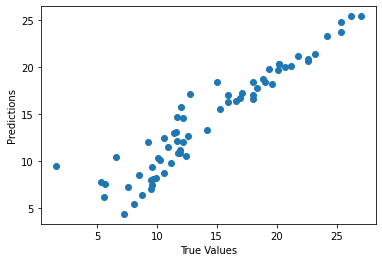

In [79]:
#plotting for the ridge_model_pred
plt.scatter(y_test, ridge_model_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# 5.Support Vector Regressor:

In [80]:
from sklearn.svm import SVR

In [81]:
svr = SVR(kernel = 'linear')
svr.fit(x_train, y_train)
svr.fit(x_test, y_test)

SVR(kernel='linear')

In [82]:
y_train_pred = svr.predict(x_train)
y_test_pred = svr.predict(x_test)

svr_score=round(svr.score(x_train, y_train)*100,2)
svr_score

88.83

Here we are getting an accuracy of our training set is 88.83%.

In [83]:
svr.score(x_test,y_test)*100

88.42644134329754

The accuracy of testing set is 88.42%

# 6.Gradient Booster Regressor:

In [84]:
from sklearn.ensemble import GradientBoostingRegressor

In [85]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
gbr.fit(x_test, y_test)

GradientBoostingRegressor()

In [86]:
y_train_pred = gbr.predict(x_train)
y_test_pred = gbr.predict(x_test)


gbr.score(x_train, y_train)*100

96.7699719197499

In [87]:
gbr.score(x_test, y_test)*100

99.9920714245945

Here the training set accuracy is 96.77% and the testing set score is 99.99%

# Cross validation:

In [127]:
print(cross_val_score(lm,x,y,cv=5).mean()*100)

88.27160786305974


In [98]:
print(cross_val_score(dt,x,y,cv=5).mean()*100)

94.17669530195276


In [90]:
print(cross_val_score(rf,x,y,cv=5).mean()*100)

97.29386487228633


In [91]:
print(cross_val_score(ridge_mod,x,y,cv=5).mean()*100)

88.28438792148307


In [92]:
print(cross_val_score(svr,x,y,cv=5).mean()*100)

87.78311370584501


In [93]:
print(cross_val_score(gbr,x,y,cv=5).mean()*100)

97.80528380342182


Though we are getting 100% accuracy in Decision Tree the cross validation score is less. So we can see that the linear regression model accuracy and the cross validation score are similar we will choose Linear Regression model as the best suit for the present model.

# Hyper Parameter tuning:

In [128]:
#we are tuning five hyperparameters  right now, we are passing different values for those parameters
parameters = { "fit_intercept":[True,False], 
              "normalize":[False,True], 
              "copy_X":[True,False], 
              "n_jobs":[0.1,0.22,-1,-2], 
              "positive":[False,True]
              }
grid = GridSearchCV(estimator=lm, param_grid = parameters, cv = 5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [0.1, 0.22, -1, -2],
                         'normalize': [False, True],
                         'positive': [False, True]})

In [129]:
best_parameters=grid.best_params_
print(best_parameters)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'normalize': True, 'positive': True}


In [130]:
(grid.best_score_)*100

88.14814280275804

In [131]:
clf=LinearRegression(fit_intercept=True, n_jobs= -1, normalize= True, positive= True)
clf.fit(x_train,y_train)

LinearRegression(n_jobs=-1, normalize=True, positive=True)

In [132]:
clf.score(x_test,y_test)*100

88.05280655009696

We are getting 88.05% which is 0.22% less than the CV score so our model is working better even without using a hyper parameters.
Thus we obtained a proper model.

# Further Evaluation:

In [133]:
Final_mod = LinearRegression()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((lm.score(x_test,y_test)*100))

88.4414507291169


# Saving the best model:

In [136]:
import pickle
filename = 'Finalmodel.pkl'
pickle.dump(Final_mod, open(filename,"wb"))
print("Model saved")

Model saved


# Conclusion:

In [146]:
preds = lm.predict(x_test)
dataframe=pd.DataFrame({})
print("Predicted sales:",preds[:36])
print("Actual Sales:",y_test[0:36].values)

Predicted sales: [[18.59646877]
 [ 8.79912771]
 [ 9.85541237]
 [ 9.97516451]
 [ 8.88525826]
 [19.87399499]
 [10.57447196]
 [16.81332971]
 [20.86642568]
 [13.71808016]
 [15.52835537]
 [ 9.08044819]
 [24.06061441]
 [21.10155579]
 [20.27538069]
 [ 6.44433598]
 [23.24596163]
 [18.24703409]
 [ 8.75696045]
 [16.98295086]
 [ 8.58423519]
 [10.58896743]
 [11.26044403]
 [11.72374612]
 [ 7.53582899]
 [24.77318422]
 [15.41077225]
 [11.11719216]
 [ 8.90745087]
 [18.89950395]
 [20.26655755]
 [ 7.72533648]
 [17.94189512]
 [24.00969827]
 [11.9621743 ]
 [12.47020884]]
Actual Sales: [[19.6]
 [10.6]
 [ 9.6]
 [10.1]
 [ 8.5]
 [21.2]
 [12.4]
 [12.8]
 [22.6]
 [11.7]
 [15.9]
 [ 9.5]
 [26.2]
 [21.8]
 [20.7]
 [ 5.6]
 [25.4]
 [19. ]
 [ 9.7]
 [18. ]
 [ 5.7]
 [ 1.6]
 [11.9]
 [11.8]
 [ 9.6]
 [27. ]
 [12. ]
 [11.9]
 [ 5.3]
 [18.9]
 [20.2]
 [ 7.6]
 [18. ]
 [25.4]
 [11.7]
 [11.4]]


The train and test data is balanced most regression methods hit the 88.4% accuracy with the dataset.